In [4]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np

with open('ensemble_sigma_noise_fidelity_2q_1.pkl', 'rb') as f:
    F_1 = pickle.load(f)
f.close()

with open('ensemble_sigma_noise_fidelity_2q_2.pkl', 'rb') as f:
    F_2 = pickle.load(f)
f.close()

with open('ensemble_sigma_noise_sigma_2q_1.pkl', 'rb') as f:
    x_1 = pickle.load(f)
f.close()

with open('ensemble_sigma_noise_sigma_2q_2.pkl', 'rb') as f:
    x_2 = pickle.load(f)
f.close()

with open('ensemble_sigma_r_squared_2q_1.pkl', 'rb') as f:
    r_1 = pickle.load(f)
f.close()

with open('ensemble_sigma_r_squared_2q_2.pkl', 'rb') as f:
    r_2 = pickle.load(f)
f.close()

In [7]:
print(F_1)
print(F_2)
print(x_1)
print(x_2)
print(r_1)
print(r_2)
print(type(x_1))

[99.91178438 99.71653603 99.46173263 99.1391691  98.45936134 98.01098565
 97.68633472 97.12386759 96.90062482 96.03923104 95.57412614]
[99.90294737 99.69336662 99.3014418  98.98542144 98.21240742 97.85116584
 97.34217223 96.9484192  96.52821439 96.23131816 95.49785669 95.16825179
 95.14038995 94.76659198 94.69036902]
[    0  2000  4000  6000  8000 10000 12000 14000 16000 18000 20000]
[ 1000  3000  5000  7000  9000 11000 13000 15000 17000 19000 21000 22000
 23000 24000 25000]
[0.99887569 0.99912014 0.9995236  0.99951342 0.99934061 0.99905012
 0.99656148 0.99704782 0.99442107 0.99360921 0.99247509]
[0.99881773 0.99942614 0.99990934 0.99974011 0.99813482 0.99554689
 0.99642021 0.99605565 0.99037257 0.99210269 0.99059283 0.98948386
 0.99110588 0.98630138 0.98494987]
<class 'numpy.ndarray'>


In [37]:
def merge(l1, l2):
    n1 = len(l1)
    n2 = len(l2)
    res = np.zeros(n1+n2)
    for i in range(n1):
        res[2*i] = l1[i]
        res[2*i+1] = l2[i]
    for i in range(n2 - n1):
        res[2*n1+i] = l2[n1+i]
    return res
            

In [38]:
x = merge(x_1, x_2)
F = merge(F_1, F_2)
r = merge(r_1, r_2)

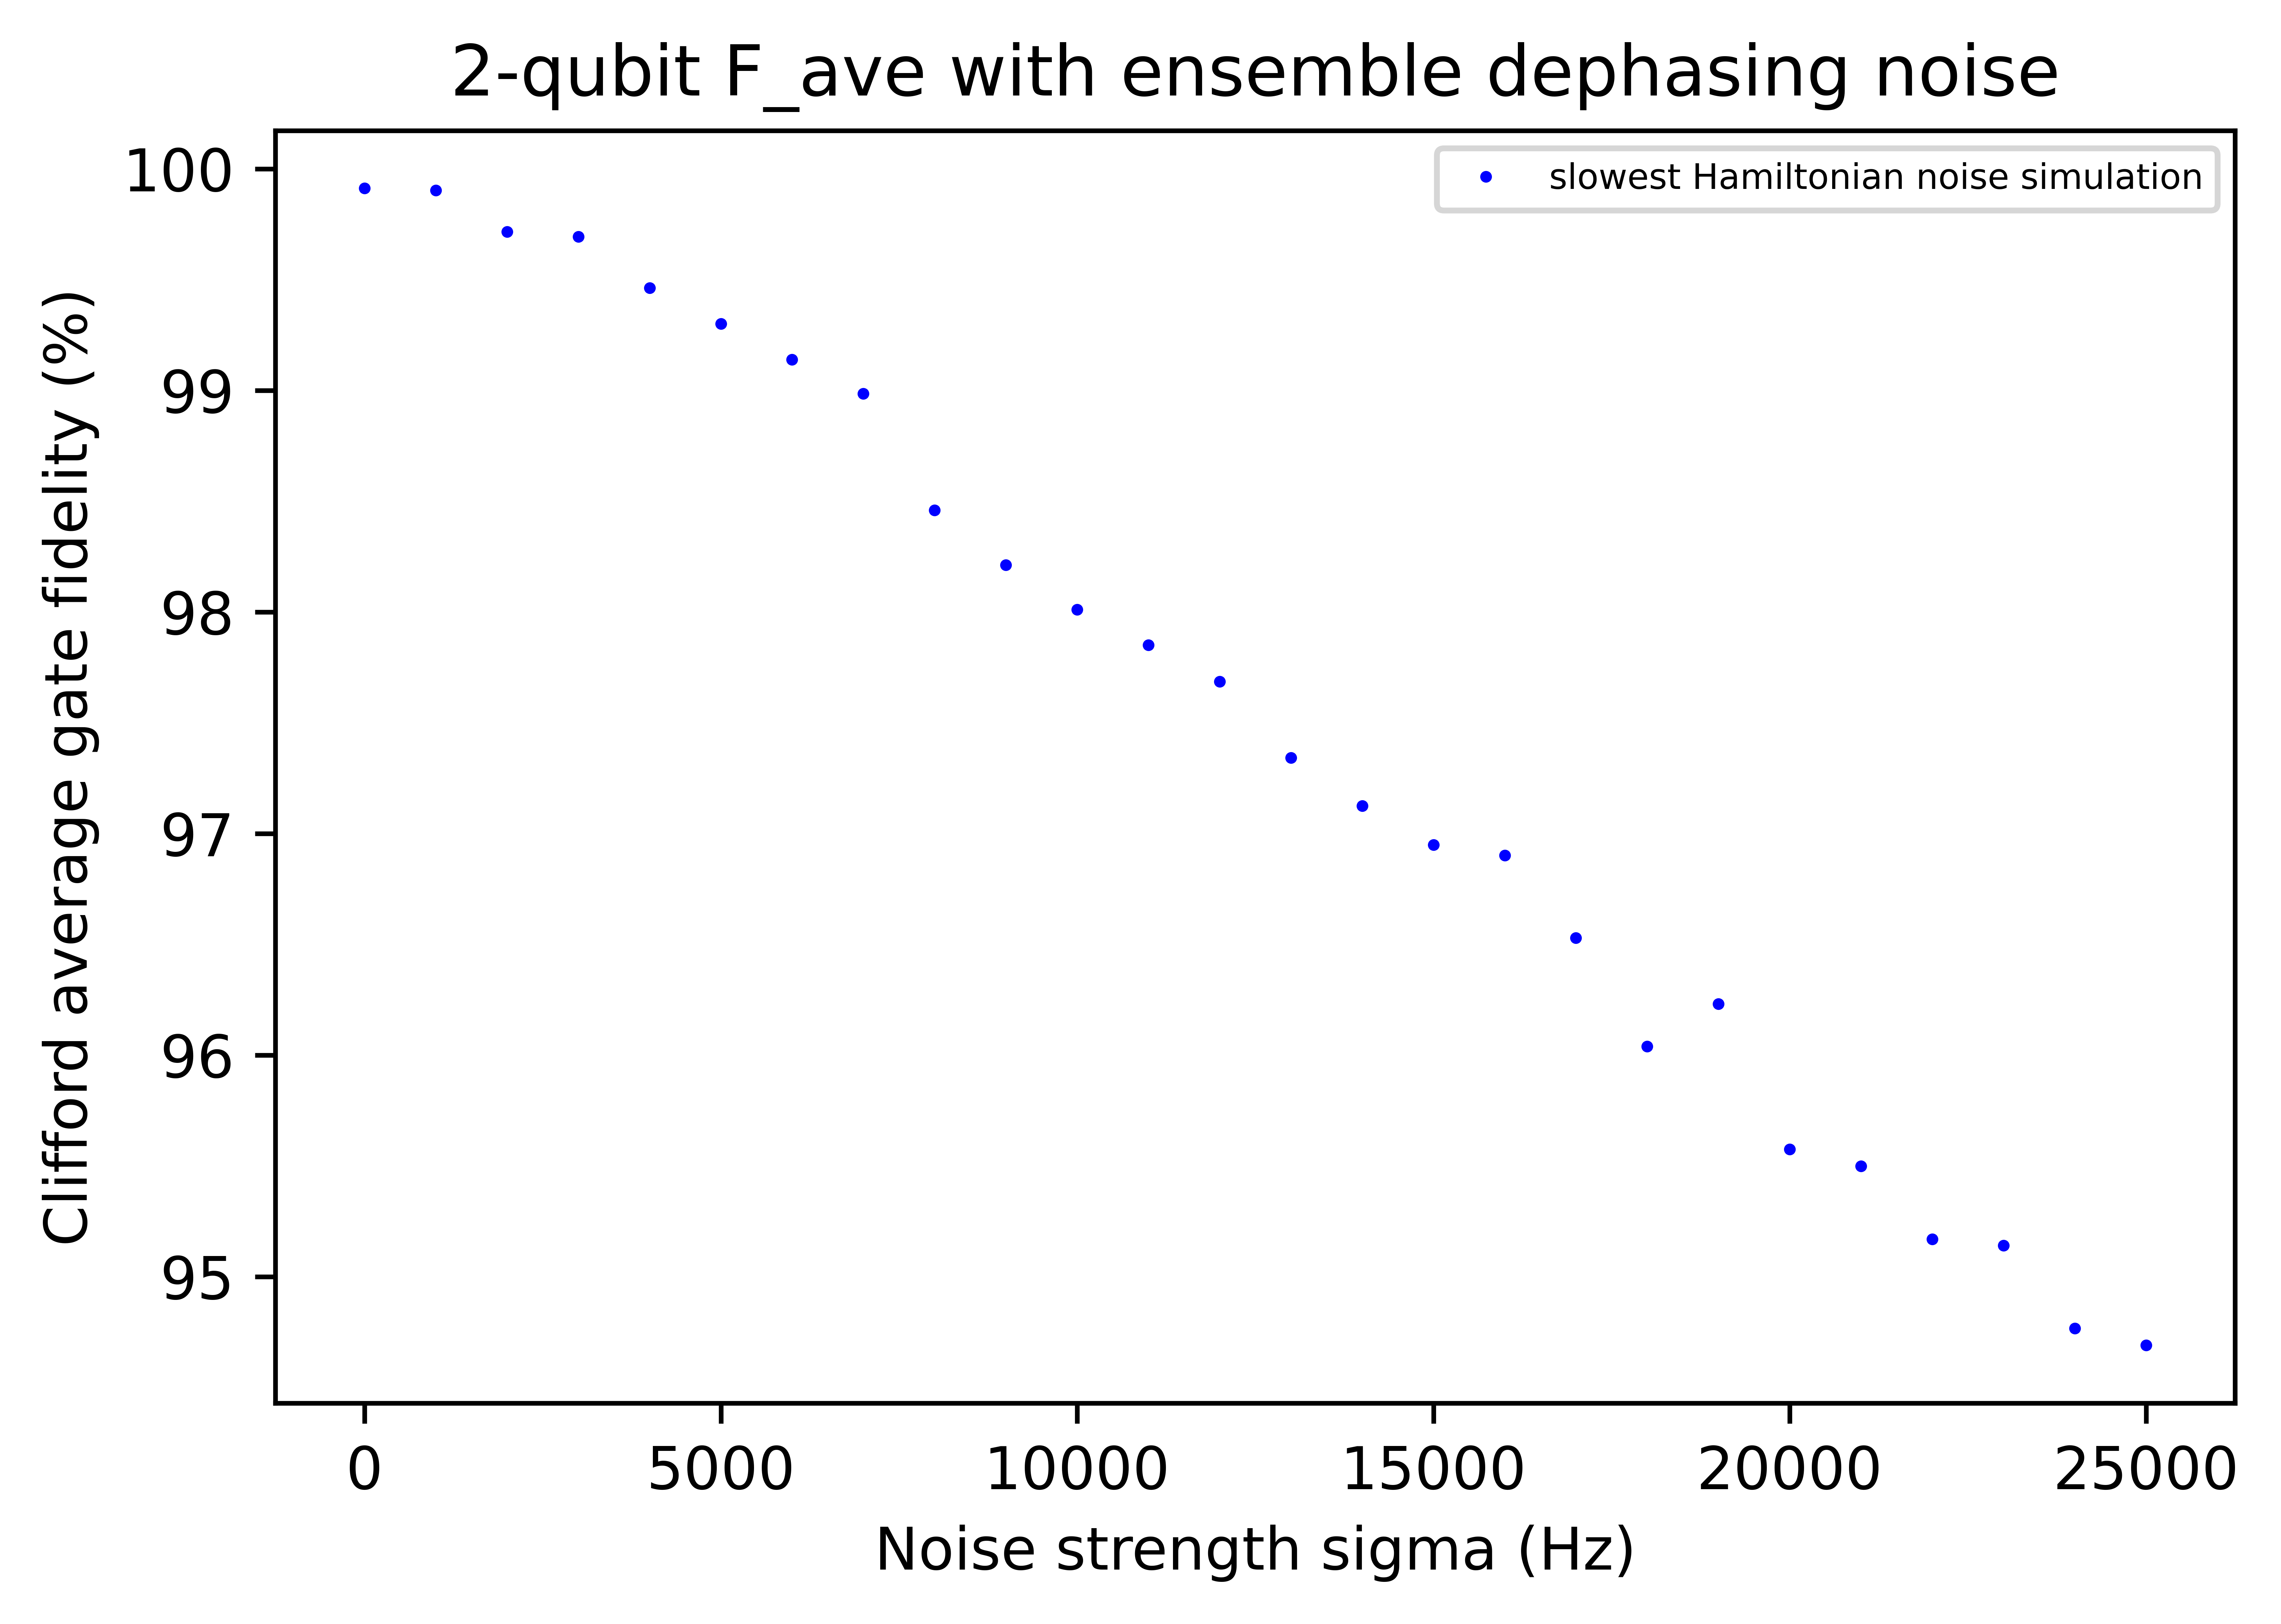

In [39]:
plt.figure(dpi=1200)
plt.title('2-qubit F_ave with ensemble dephasing noise')

plt.plot(x, F, 'bo', markersize=1, label='slowest Hamiltonian noise simulation')

plt.xlabel("Noise strength sigma (Hz)")
plt.ylabel("Clifford average gate fidelity (%)")
plt.legend(prop={'size': 6})
plt.show()


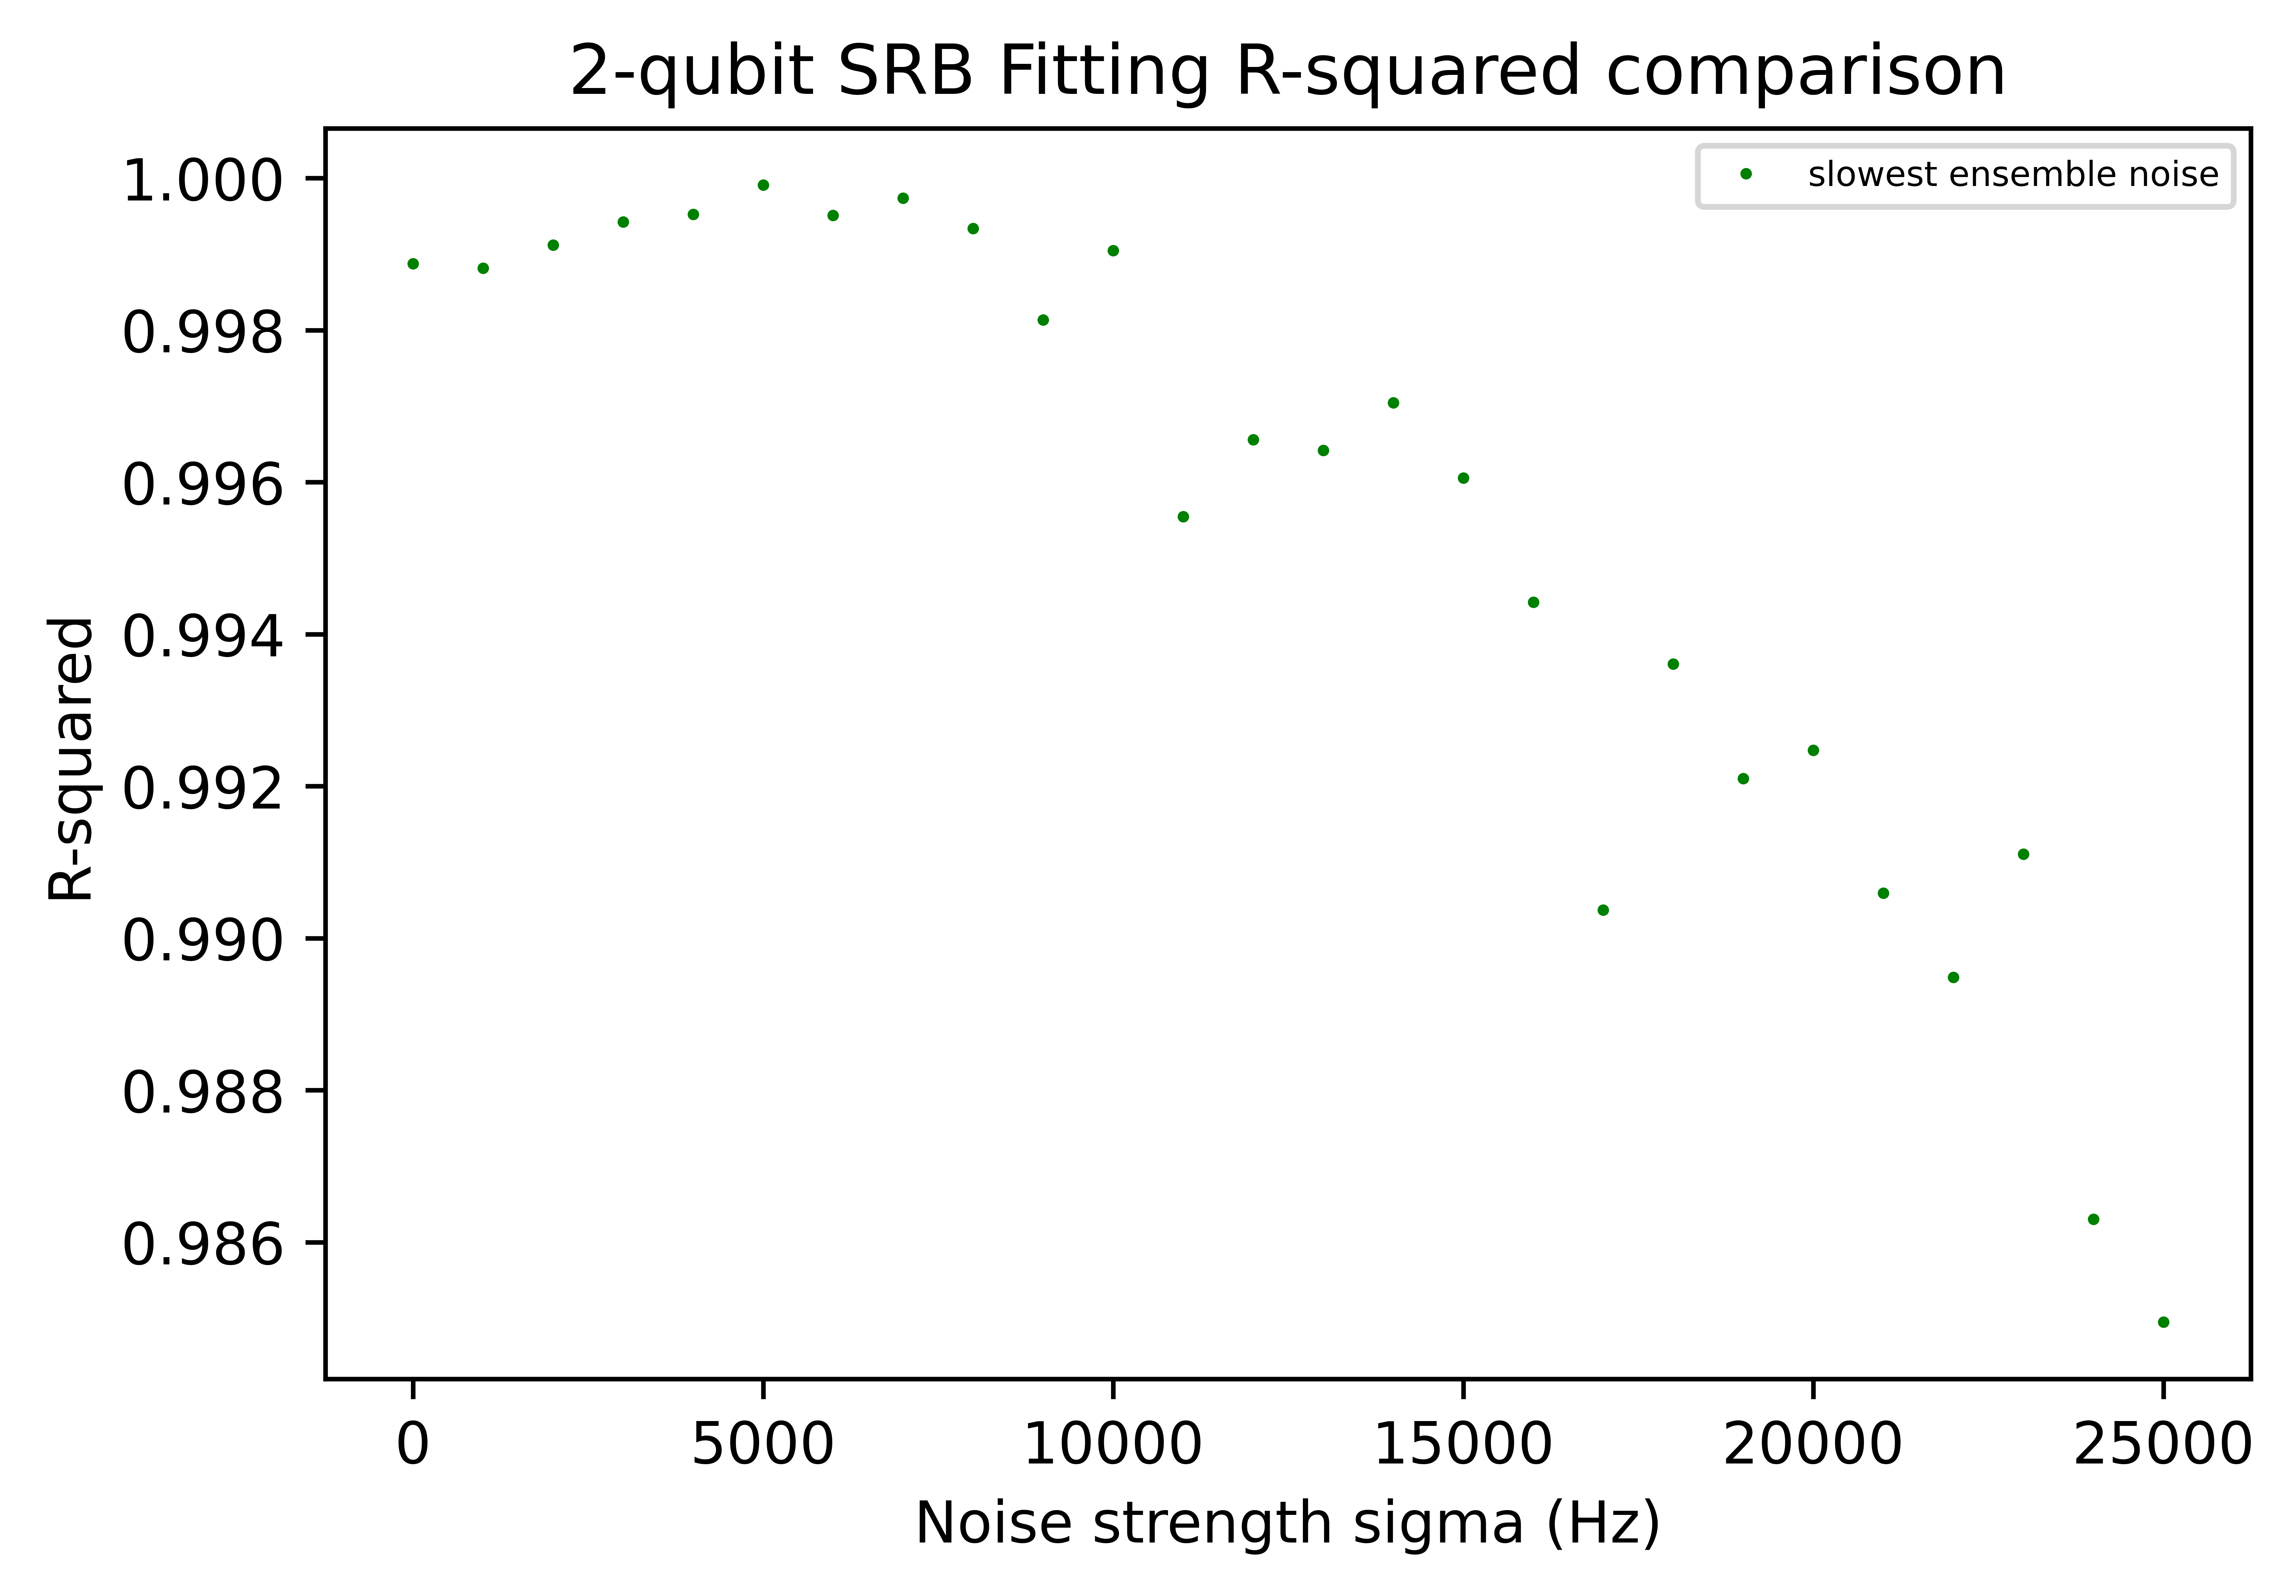

In [40]:
plt.figure(dpi=1200)
plt.title('2-qubit SRB Fitting R-squared comparison')
plt.plot(x, r, 'go', markersize=1, label='slowest ensemble noise')


plt.xlabel("Noise strength sigma (Hz)")
plt.ylabel("R-squared")
plt.legend(prop={'size': 6})
plt.show()

In [41]:
f2 = open('ensemble_sigma_noise_fidelity_2q_slowest.pkl', 'wb')
pickle.dump(F, f2)
f2.close()

f2 = open('ensemble_sigma_noise_sigma_2q_slowest.pkl', 'wb')
pickle.dump(x, f2)
f2.close()

f2 = open('ensemble_sigma_r_squared_2q_slowest.pkl', 'wb')
pickle.dump(r, f2)
f2.close()